In [101]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [102]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [103]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [104]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [105]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [106]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [107]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [108]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":32.09,"feels_like":22.35,"temp_min":28.99,"temp_max":36,"pressure":1031,"humidity":55},"visibility":10000,"wind":{"speed":8.05,"deg":190},"clouds":{"all":0},"dt":1604189806,"sys":{"type":1,"id":4967,"country":"US","sunrise":1604143010,"sunset":1604180322},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [109]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 32.09,
  'feels_like': 22.35,
  'temp_min': 28.99,
  'temp_max': 36,
  'pressure': 1031,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 190},
 'clouds': {'all': 0},
 'dt': 1604189806,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1604143010,
  'sunset': 1604180322},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [110]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [111]:
# Get the JSON data.
boston_data = city_weather.json()

In [112]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 36 55 0 8.05


In [113]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-11-01 00:16:46'

In [114]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/31/20'

In [115]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adrar
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | tilichiki
Processing Record 4 of Set 1 | lukovetskiy
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | morondava
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | lat yao
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | fomboni
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | rosarito
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | hammerfest
Processing Recor

Processing Record 37 of Set 4 | iqaluit
Processing Record 38 of Set 4 | khonuu
City not found. Skipping...
Processing Record 39 of Set 4 | zakamensk
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | mezen
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | byron bay
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | maragogi
Processing Record 46 of Set 4 | neiafu
Processing Record 47 of Set 4 | sal rei
Processing Record 48 of Set 4 | olafsvik
Processing Record 49 of Set 4 | mocajuba
Processing Record 50 of Set 4 | la seyne-sur-mer
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | khandyga
Processing Record 3 of Set 5 | voi
Processing Record 4 of Set 5 | mabaruma
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | derzhavinsk
Processing Record 7 of Set 5 | bluff
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 | padang
Processing Record 10 of Set 5 | san

Processing Record 29 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 30 of Set 8 | genhe
Processing Record 31 of Set 8 | athabasca
Processing Record 32 of Set 8 | ojinaga
Processing Record 33 of Set 8 | victoria
Processing Record 34 of Set 8 | san martin
Processing Record 35 of Set 8 | nassau
Processing Record 36 of Set 8 | durban
Processing Record 37 of Set 8 | manicore
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | hervey bay
Processing Record 41 of Set 8 | arona
Processing Record 42 of Set 8 | kirando
Processing Record 43 of Set 8 | akyab
Processing Record 44 of Set 8 | husavik
Processing Record 45 of Set 8 | nikolayevsk-na-amure
Processing Record 46 of Set 8 | hay river
Processing Record 47 of Set 8 | desna
Processing Record 48 of Set 8 | dudinka
Processing Record 49 of Set 8 | benjamin aceval
Processing Record 50 of Set 8 | plouzane
Processing Record 1 of Set 9 | zagreb
Processi

Processing Record 17 of Set 12 | saint-pacome
City not found. Skipping...
Processing Record 18 of Set 12 | nhulunbuy
Processing Record 19 of Set 12 | saint-augustin
Processing Record 20 of Set 12 | rio grande
Processing Record 21 of Set 12 | kuloy
Processing Record 22 of Set 12 | soyo
Processing Record 23 of Set 12 | mookane
Processing Record 24 of Set 12 | sale
Processing Record 25 of Set 12 | shache
Processing Record 26 of Set 12 | pasan
Processing Record 27 of Set 12 | kaeo
Processing Record 28 of Set 12 | imeni poliny osipenko
Processing Record 29 of Set 12 | owando
Processing Record 30 of Set 12 | les cayes
Processing Record 31 of Set 12 | barra patuca
Processing Record 32 of Set 12 | diego de almagro
Processing Record 33 of Set 12 | gat
Processing Record 34 of Set 12 | bali
Processing Record 35 of Set 12 | dongsheng
Processing Record 36 of Set 12 | nogent-le-rotrou
Processing Record 37 of Set 12 | kalga
Processing Record 38 of Set 12 | the valley
Processing Record 39 of Set 12 | 

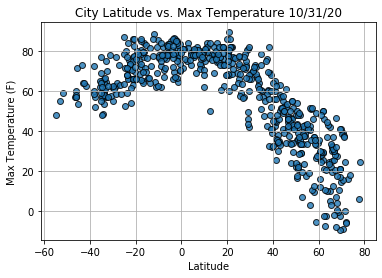

In [116]:
# Build the scatter plot for latitude vs. max temperature.
import matplotlib.pyplot as plt

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

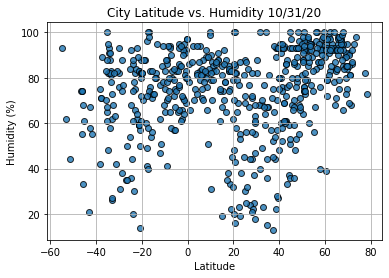

In [118]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

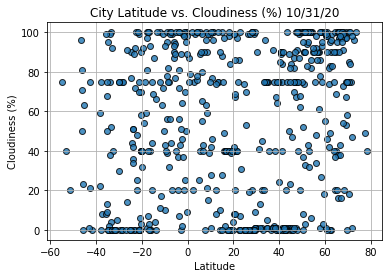

In [120]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

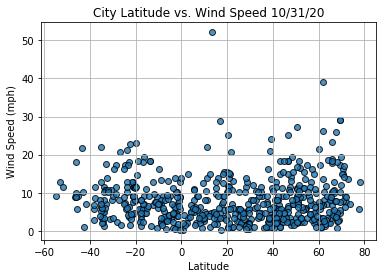

In [122]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()